# Sales of shampoo over three years - Time series Analysis

## 1. Đọc dữ liệu **sales-of-shampoo-over-a-three-year.csv**

In [29]:
library('xts')

In [2]:
df = read.csv('data/sales-of-shampoo-over-a-three-year.csv')
colnames(df) = c('Month', 'Sales')
head(df)

,Month,Sales
,<chr>,<dbl>
1,"Friday, January 1, 2016",266.0
2,"Monday, February 1, 2016",145.9
3,"Tuesday, March 1, 2016",183.1
4,"Friday, April 1, 2016",119.3
5,"Sunday, May 1, 2016",180.3
6,"Wednesday, June 1, 2016",168.5


## 2. Xem thông tin chung từ dữ liệu: số dòng, số cột, summary, str

In [5]:
print(paste('Number of rows:', dim(df)[1]))
print(paste('Number of columns:', dim(df)[2]))

[1] "Number of rows: 36"
[1] "Number of columns: 2"


In [7]:
print('Summary of data')
summary(df)

[1] "Summary of data"


    Month               Sales      
 Length:36          Min.   :119.3  
 Class :character   1st Qu.:192.4  
 Mode  :character   Median :280.1  
                    Mean   :312.6  
                    3rd Qu.:411.1  
                    Max.   :682.0  

In [8]:
print('Structure of data')
str(df)

[1] "Structure of data"
'data.frame':	36 obs. of  2 variables:
 $ Month: chr  "Friday, January 1, 2016" "Monday, February 1, 2016" "Tuesday, March 1, 2016" "Friday, April 1, 2016" ...
 $ Sales: num  266 146 183 119 180 ...


## 3. Chuyển dữ liệu thành Time Series object.

In [11]:
df_ts = ts(df[2], start=c(2016, 1), frequency=12)
print(df_ts)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2016 266.0 145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
2017 194.3 149.5 210.1 273.3 191.4 287.0 226.0 303.6 289.9 421.6 264.5 342.3
2018 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.0 475.3 581.3 646.9


## 4. Vẽ Time Series object vừa tạo

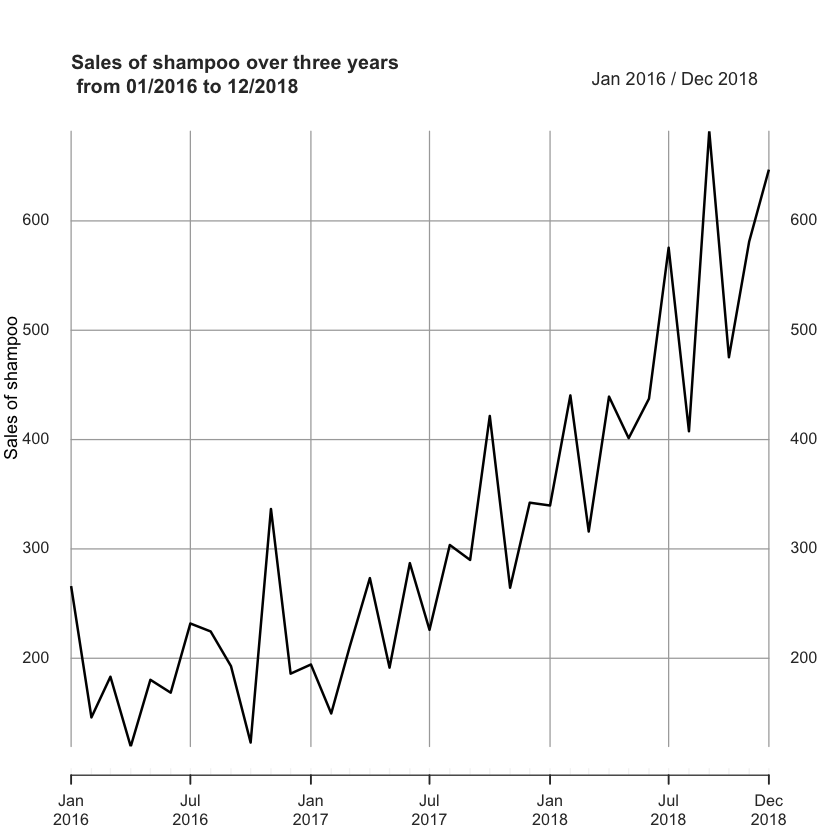

In [28]:
plot(as.xts(df_ts), major.format="%b-%Y",
    main='Sales of shampoo over three years \n from 01/2016 to 12/2018',
    xlab='Time', ylab='Sales of shampoo')

**Nhận xét**: Doanh thu dầu gội đầu có xu hướng tăng dần qua các năm, đặc biệt là từ 2017-2018

## 5. Thực hiện việc decomposition và nhận xét

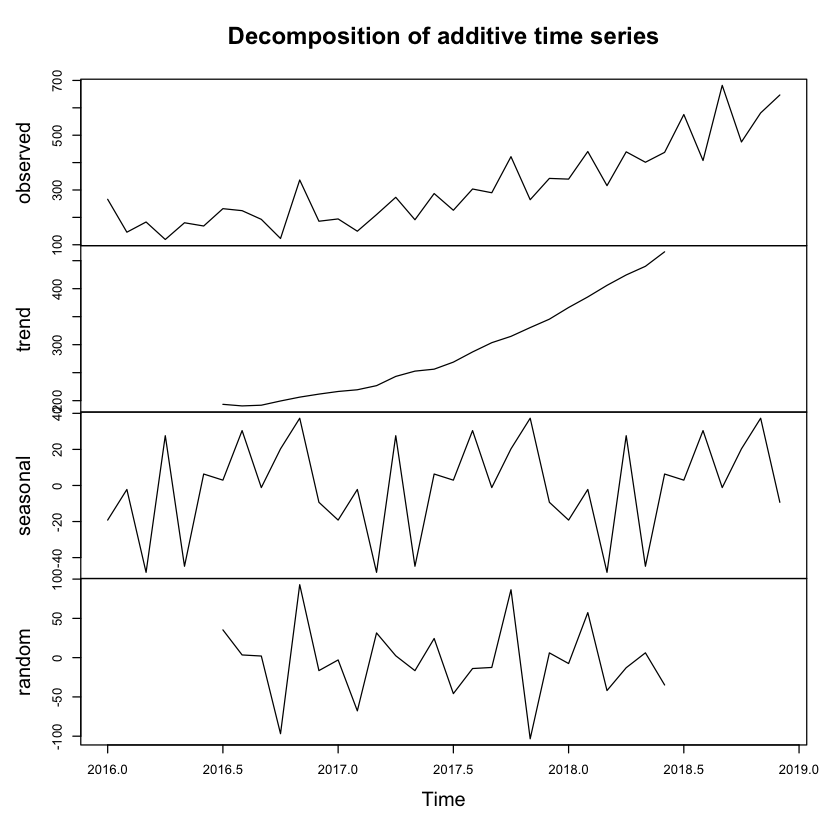

In [35]:
comp = decompose(df_ts)
plot(comp)

**Nhận xét**: 
- Phần trend có xu hướng khá tốt
- Phần seasonal và random ít có xu hướng cụ thể hơn

In [31]:
comp$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,NA,NA,NA,NA,NA,NA,193.4708,190.6333,191.9083,199.4500,206.3292,211.7292
2017,216.4250,219.4792,226.8208,243.3125,252.7583,256.2750,268.8500,287.0292,303.5583,314.8833,330.5458,345.5583
2018,366.3875,385.2833,405.9542,424.5292,439.9667,465.8583,NA,NA,NA,NA,NA,NA


**Nhận xét**:
- Trend tăng khá rõ rệt từ cuối năm 2016 đến năm giữa năm 2018
- Trend gần như tăng dần đều hoàn hảo tuyến tính qua các mốc thời gian nói trên

In [30]:
comp$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424
2017,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424
2018,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424


**Nhận xét**: 
- Yếu tố theo mùa trong năm (xuân-hạ-thu-đông) biến động không rõ rệt lắm.
- Các biến động tăng giảm seasonal qua các tháng trong năm khó có thể thấy theo 1 trend cụ thể nào.
- Các tháng có bình quân doanh thu cao là tháng 4, 8, 10, 11
- Các tháng có bình quân doanh thu sụt giảm mạnh là tháng 1, 3, 5

In [32]:
comp$random

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,NA,NA,NA,NA,NA,NA,35.377257,3.435590,2.062674,-96.845660,92.896007,-16.497743
2017,-2.931076,-67.760243,31.454340,2.396007,-16.558160,24.379340,-45.801910,-13.860243,-12.487326,86.421007,-103.320660,6.073090
2018,-7.493576,57.335590,-41.878993,-12.820660,6.133507,-34.803993,NA,NA,NA,NA,NA,NA


**Nhận xét**:
- Phần dư random tăng giảm khá ngẫu nhiên qua các tháng trong năm
- Ít thấy có 1 xu hướng thật sự nào

## 6. Thực hiện việc dự báo và vẽ biểu đồ so sánh với thực tiễn

Vì trend như theo phân tích ở trên khá tuyến tính, nên sử dụng seasonal = 'additive' cho model HoltWinters

In [37]:
model = HoltWinters(df_ts, seasonal = 'additive')
model

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = df_ts, seasonal = "additive")

Smoothing parameters:
 alpha: 0.0462919
 beta : 1
 gamma: 0.3092983

Coefficients:
          [,1]
a   581.614100
b    25.523251
s1   -7.456334
s2  -17.598651
s3  -26.048267
s4   39.317793
s5  -42.846783
s6   23.775660
s7   47.481528
s8    2.009811
s9   57.587196
s10 -27.206978
s11  61.163580
s12  12.560525

**Nhận xét**:
- ***alpha (0.046) rất thấp***: cho thấy doanh thu dầu gội hiện tại phụ thuộc vào doanh thu các tháng gần đây và một số ít mốc thời gian khá xa trong quá khứ.

- ***beta (1) rất cao***: cho thấy độ dốc của xu hướng chính trong tăng trưởng doanh thu là hoàn hảo
- ***gamma (0.309) khá thấp***: cho thấy có ảnh hưởng của yếu tố theo mùa đối với doanh thu, tuy nhiên điều này là không lớn

In [38]:
sse = model$SSE
sse

[1] 183222

In [39]:
mse = sse/length(df_ts)
mse

[1] 5089.499

In [40]:
rmse = sqrt(mse)
rmse

[1] 71.34072

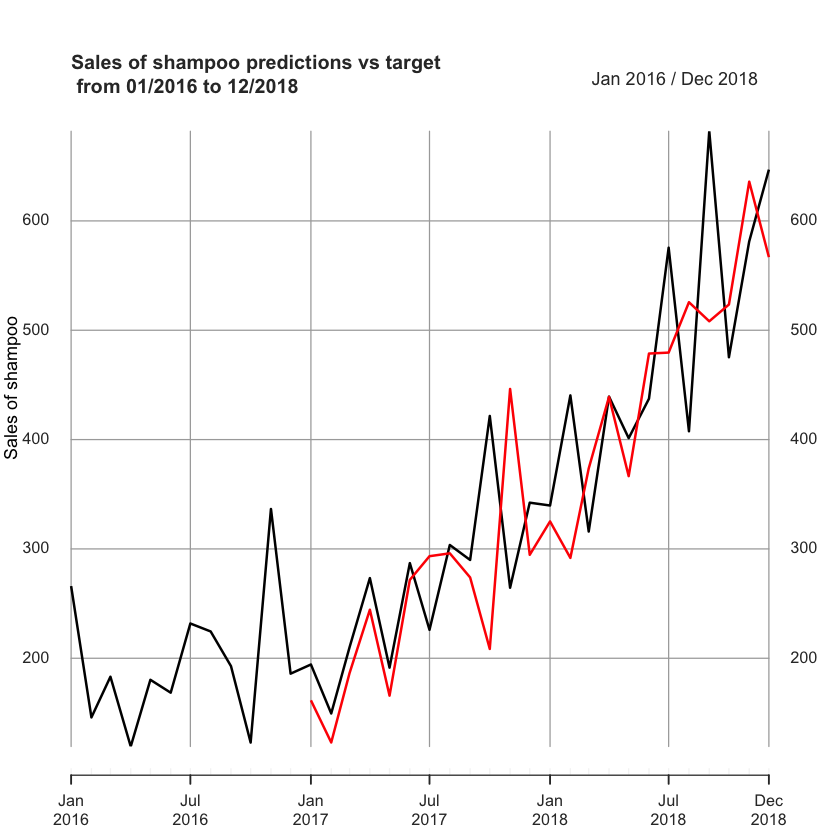

In [103]:
result = model$fitted[,1]
result = cbind(result, target=model$x)
plot(as.xts(result), major.format="%b-%Y",
    main='Sales of shampoo predictions vs target \n from 01/2016 to 12/2018',
    ylab='Sales of shampoo', col=c('red', 'black'))

**Nhận xét**:
- Model có dự đoán khá đúng về trend
- Tuy nhiên vì đặc tính dữ liệu không nhiều tính chất theo mùa nên dự đoán tăng giảm trong năm còn chưa chính xác

## 7. Dự đoán lượng sales cho 6 tháng tiếp theo

In [104]:
forecast.new = forecast:::forecast.HoltWinters(model, h = 6)
forecast.new

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       599.6810 487.5725 711.7895 428.2259 771.1361
Feb 2019       615.0620 502.4740 727.6499 442.8736 787.2504
Mar 2019       632.1356 518.4763 745.7949 458.3086 805.9625
Apr 2019       723.0249 607.4854 838.5644 546.3225 899.7273
May 2019       666.3836 547.9661 784.8011 485.2796 847.4875
Jun 2019       758.5293 636.0862 880.9723 571.2688 945.7897

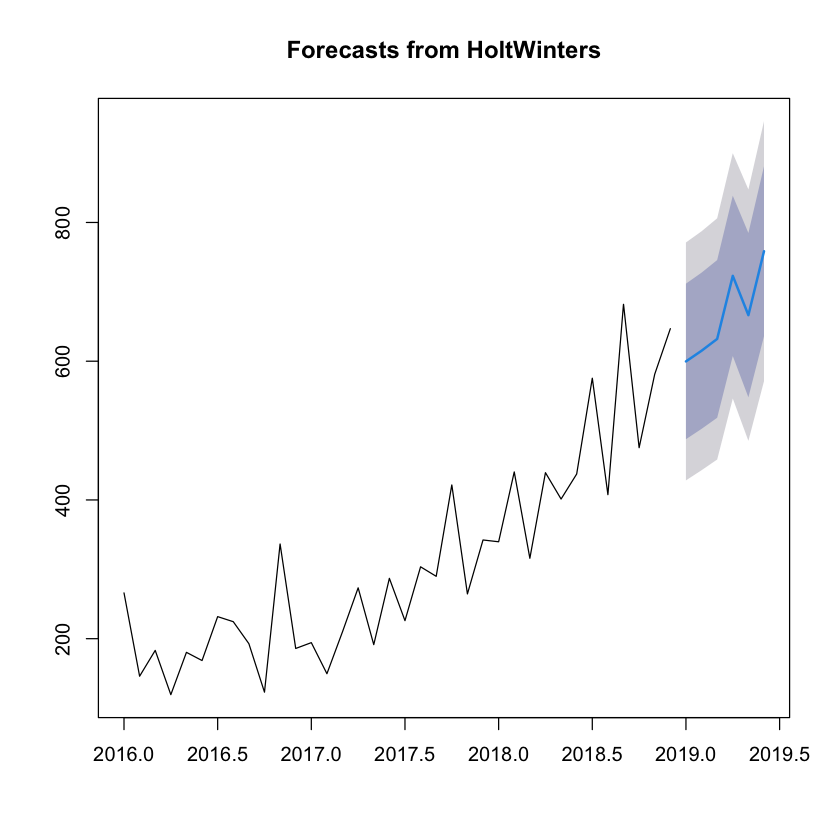

In [109]:
plot(forecast.new)